## Task 1

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt


### Task 2e

De Casteljau's algorithm 

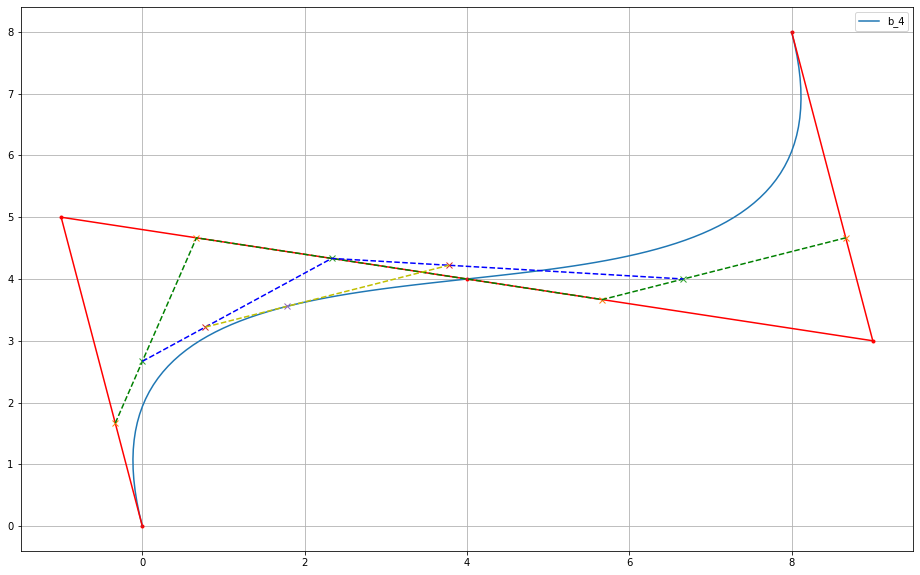

In [8]:
def de_Casteljau(P,t0):
    '''
    function that implements the de Casteljau algorithm

    input:
        P: vector of points we want to make a Bezier Curve for 
        t0: t-parameter 
    output:
        Pvecs[-1,0]: the point on the Bezier curve for t0 
        Pvecs[:,0]: vector of points for every "level" k considered 
    '''
    n,d = np.shape(P) #get dimentions of P 
    Pvecs = np.zeros((n, n, d)) #create matrix of points  
    Pvecs[0,:] = P #initialize the matrix 
    for k in range(1,n): #double for-loop to calculate the Bezier curve at t0 
        for i in range(0,n-k):
            Pvecs[k,i] = (1-t0) * Pvecs[k-1,i] + t0 * Pvecs[k-1, i+1] #de Casteljau's algorithm 
    return Pvecs[-1,0], Pvecs
    

p0 = [0,0]; p1 = [-1,5]; p2 = [4,4]; p3 = [9,3]; p4 = [8,8] #points that we want to make our Bezier curve for 
P = np.array([p0, p1, p2, p3, p4]) #make it into numpy array 


T = np.linspace(0,1, 100) #our time interval 

Pvecs = np.zeros((len(T),  2))#our bezier curve for different k-levels 
Pvecs2 = np.zeros((len(T), len(P),len(P), 2))
for t in range(len(T)): #for loop that uses de Casteljaus algrorithm 
    Pvecs[t] = de_Casteljau(P, T[t])[0]

plt.figure(figsize = (16,10))    
plt.plot(P[:,0], P[:,1], 'r.') #plot the points we want to make Bezier curve for 

plt.plot(Pvecs[:,0], Pvecs[:,1], label = f'b_4')

points2 = de_Casteljau(P, 1/3)[1]

plt.plot(points2[0,:,0], points2[0,:,1], 'r-')  
plt.plot(points2[1,:4,0], points2[1,:4,1], 'x')
plt.plot(points2[1,:4,0], points2[1,:4,1], 'g--')
plt.plot(points2[2,:3,0], points2[2,:3,1], 'x')
plt.plot(points2[2,:3,0], points2[2,:3,1], 'b--')
plt.plot(points2[3,:2,0], points2[3,:2,1], 'x')
plt.plot(points2[3,:2,0], points2[3,:2,1],'y--')   
plt.plot(points2[4,:1,0], points2[4,:1,1], 'x')
plt.grid(True)
plt.legend()

### Task 3 a

Composite Bezier curve 

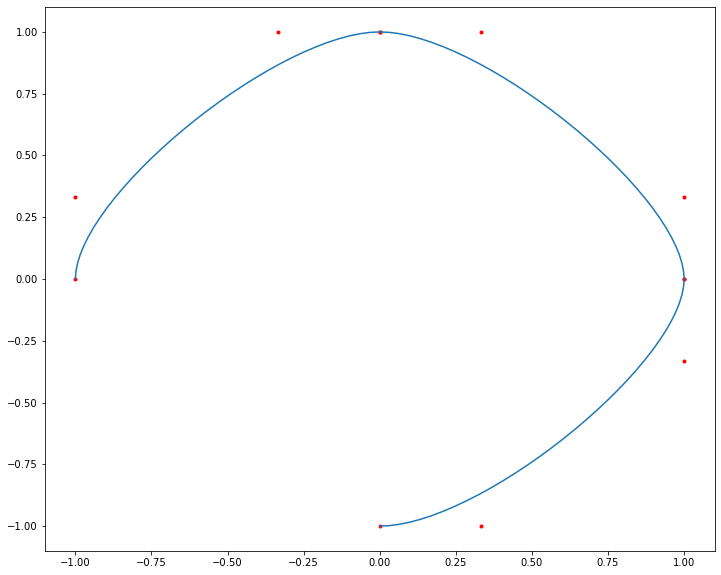

In [48]:
def composite_Bezier(P,t):
    '''
    Computes the composite Nezier curve for a set of points P on time interval t 
    input:
        P: points we want to compute the Bezier curve for
        t: time interval points 
    output:
        B: Bezier curve as a function of time, t
    '''
    B = np.zeros((len(t),2)) #array for our Bezier curve 
    i = 0 #indicator of the segment 
    for k in range(len(t)): 
        B[k] = de_Casteljau(P[:,i],t[k]-i)[0] #compute Bezier curve at a discrete point 
        if(int(np.floor(t[k])>i)): #if test that changes the segment 
            i+=1
    return B 
    
P = np.zeros((4, 3, 2)) #the points we want to make Bezier cruve for
P[0,0] = [-1,0];P[1,0] = [-1,1/3]; P[2,0] = [-1/3, 1]; P[3,0] = [0,1]
P[0,1] = [0,1];P[1,1] = [1/3,1]; P[2,1] = [1, 1/3]; P[3,1] = [1,0]
P[0,2] = [1,0];P[1,2] = [1,-1/3]; P[2,2] = [1/3, -1]; P[3,2] = [0,-1]

T = np.linspace(0,3,100) #time array 
B = composite_Bezier(P,T) #Bezier curve 
plt.figure(figsize = (12,10))
plt.plot(P[:,:,0], P[:,:,1], 'r.')
plt.plot(B[:,0], B[:,1])

### Task 3 b 

Construct algorithm for periodic composite cubic Bezier curve 

$$
\mathbf{B}(t) = \left\{ b_3(t - i +1; \mathbf{p}_{0,i}, \mathbf{p}_{1,i}, \mathbf{p}_{2,i}, \mathbf{p}_{3,i})  
\right. = \left\{ b_3(t - i +1; \mathbf{a}_{i}, \frac{\mathbf{v}_{i}}{3} + \mathbf{a}_{i}, \mathbf{a}_{i+1}-\frac{\mathbf{v}_{i+1}}{3} ,\mathbf{a}_{i+1} )  
\right.
$$

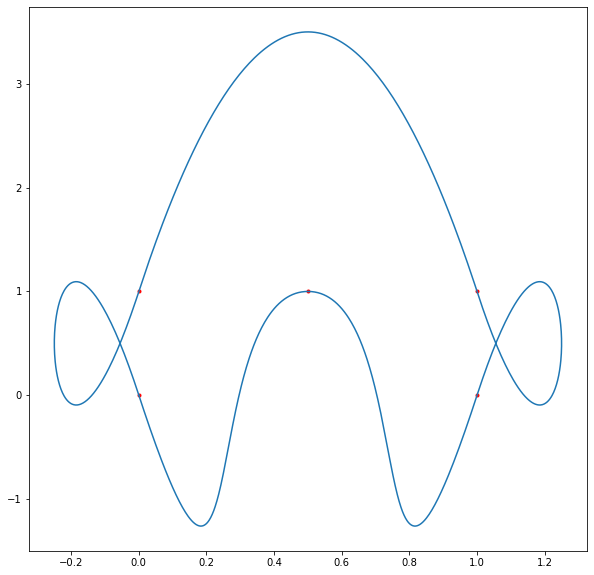

In [49]:
def interpolate_periodic(A,V):
    ''' 
    Function that uses the properties of Bezier curve to periodically interpolate points and its velocities 
    The functions returns control points for a Bezier curve 
    
    input: 
        A: datapoints we want to interpolate
        V: velocities at the datapoints
    output:
        P: control points for a Bezier curve 
    '''
    m,d = np.shape(A) #get shape of A 
    P = np.zeros((4,m,d)) #cinstruct array that contains our controlpoints
    for i in range(m-1):
        P[0,i] = A[i]
        P[1,i] = A[i] + V[i]/3
        P[2,i] = A[i+1] - V[i+1]/3
        P[3,i] = A[i+1]
    
    P[0,-1] = A[-1]
    P[1,-1] = A[-1] + V[-1]/3
    P[2,-1] = A[0] - V[0]/3
    P[3,-1] = A[0]
        
    return P

A = np.array([[0,0], [0,1], [1,1], [1,0], [0.5,1]])
m,d = np.shape(A)
V = np.array([[-1,10], [1,10], [1,-10], [-1,-10], [-1,0]])
P2 = interpolate_periodic(A,V)
T2 = np.linspace(0,m,1000)

curve = composite_Bezier(P2,T2)
plt.figure(figsize = (10,10))
plt.plot(P2[0,:,0], P2[0,:,1], 'r.')
plt.plot(curve[:,0], curve[:,1])


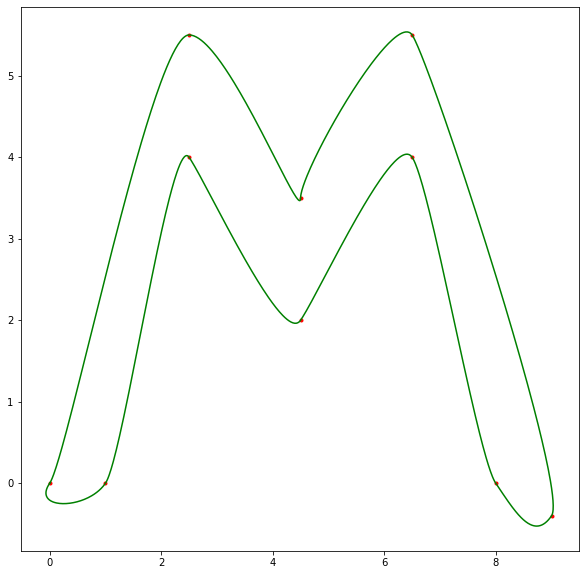

In [42]:
M = np.array([[0,0], [2.5, 5.5],  [4.5, 3.5], [6.5,5.5], [9,-0.4], [8,0], [6.5,4], [4.5, 2], [2.5,4],[1,0]])
MV = np.array([[1,1], [2, 0],  [0, 1], [1,-1], [-1,-1], [-1,1], [-1,1], [-1,-1], [-1,1], [-1,-1], [-1,-1]])
m,d = np.shape(M)
P_M = interpolate_periodic(M,MV)
T_M = np.linspace(0,m,1000)

curve_M = composite_Bezier(P_M,T_M)
plt.figure(figsize =(10,10))
plt.plot(P_M[0,:,0],P_M[0,:,1], 'r.')
plt.plot(curve_M[:,0], curve_M[:,1], 'g')


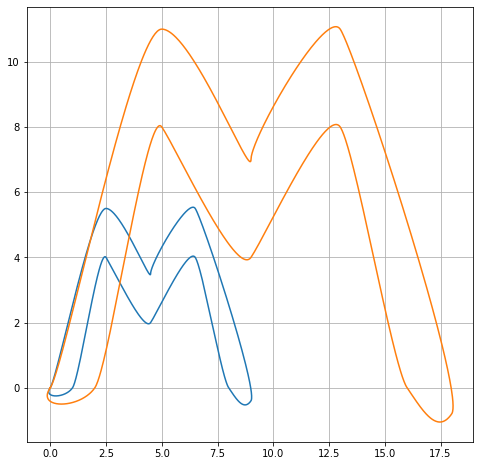

In [43]:
Q = 2 * P_M.copy()
curve_Q = composite_Bezier(Q, T_M)
plt.figure(figsize = (8,8))
plt.plot(curve_M[:,0], curve_M[:,1])
plt.plot(curve_Q[:,0], curve_Q[:,1])
plt.grid(True)

3 9


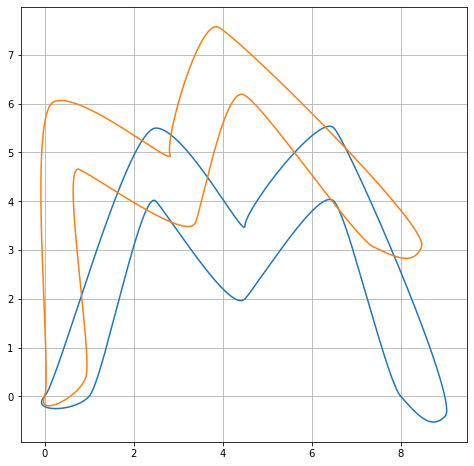

In [44]:
R_matrix = np.array([[np.cos(np.pi/8), -np.sin(np.pi/8)], [np.sin(np.pi/8), np.cos(np.pi/8)]])
R = np.zeros(np.shape(P_M))
for i in range(np.shape(P_M)[0]):
    for j in range(np.shape(P_M)[1]):
        R[i,j] = np.dot(R_matrix, P_M[i,j])
print(i,j)
curve_R = composite_Bezier(R, T_M)
plt.figure(figsize = (8,8))
plt.plot(curve_M[:,0], curve_M[:,1])
plt.plot(curve_R[:,0], curve_R[:,1])
plt.grid(True)

3 9


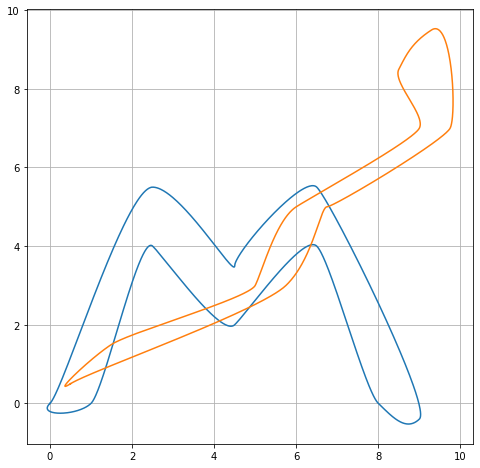

In [45]:
S_matrix = np.array([[1, 1/2], [1, 0]])
cs = 1/2 * np.array([1,1])
S = np.zeros(np.shape(P_M))

for i in range(np.shape(P_M)[0]):
    for j in range(np.shape(P_M)[1]):
        S[i,j] = np.dot(S_matrix, P_M[i,j]) + cs # + P_M[i,j]
print(i,j)
curve_S = composite_Bezier(S, T_M)
plt.figure(figsize = (8,8))
plt.plot(curve_M[:,0], curve_M[:,1])
plt.plot(curve_S[:,0], curve_S[:,1])
plt.grid(True)

3 9


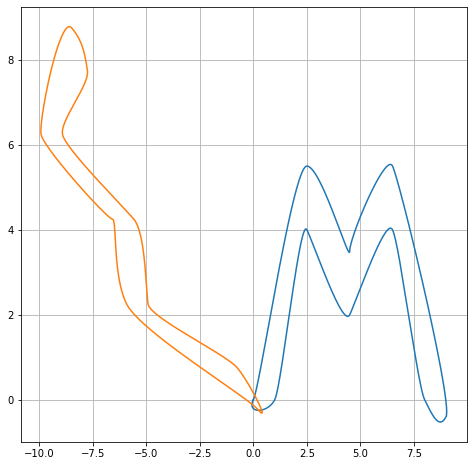

In [46]:
T_matrix = np.array([[-1, -2/3], [1, 0]])
T = np.zeros(np.shape(P_M))
ct = 1/4 * np.array([1,-1])
for i in range(np.shape(P_M)[0]):
    for j in range(np.shape(P_M)[1]):
        T[i,j] = np.dot(T_matrix, P_M[i,j])+ ct
print(i,j)
curve_T = composite_Bezier(T, T_M)
plt.figure(figsize = (8,8))
plt.plot(curve_M[:,0], curve_M[:,1])
plt.plot(curve_T[:,0], curve_T[:,1])
plt.grid(True)